# HW4_Problem1_Convolutional Neural Networks

In [4]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten 
from tensorflow.keras.optimizers import SGD

## a. Loading dataset

In [7]:
# import mnist and download dataset
from keras.datasets import mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [8]:
# print out the shape of the train and test dataset matrices
print("train_X shape:", train_X.shape) # train_X shape: (60000, 28, 28)
print("test_X shape:", test_X.shape) # test_X shape: (10000, 28, 28)

train_X shape: (60000, 28, 28)
test_X shape: (10000, 28, 28)


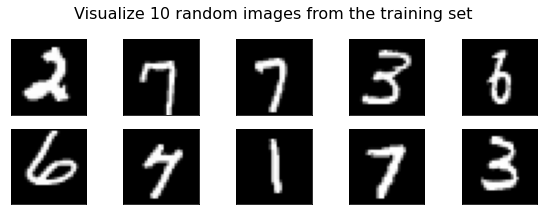

In [9]:
# Pick 10 random images from the training set
# visualize them by using imshow() function in pyplot
numImage = 10
fig = plt.figure(figsize=(8,3))
fig.suptitle('Visualize 10 random images from the training set', fontsize=16)
for i in range(numImage):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    img = train_X[np.random.randint(train_X.shape[0])]
    plt.imshow(img, cmap="gray")
plt.tight_layout()
plt.show()
fig.savefig("visualize-10-random", facecolor='white', edgecolor='none') # save fig

## b. Preprocessing

In [10]:
# Preprocessing:
# 1. reshape the matrix such that we have a 28 x 28 x 1 sized matrix holding each input data-point 
# 2. scale the pixel values such that they lie between 0.0 and 1.0
def preprocess(data):
    data = data.astype("float32") / 255
    data = np.expand_dims(data, -1)
    return data

train_X = preprocess(train_X)
print("train_X shape:", train_X.shape) # train_X shape: (60000, 28, 28, 1)
test_X = preprocess(test_X)
print("test_X shape:", test_X.shape) # test_X shape: (10000, 28, 28, 1)

train_X shape: (60000, 28, 28, 1)
test_X shape: (10000, 28, 28, 1)


In [11]:
# convert output variable into a one-hot vector by using the function to_categorical
print("train_Y shape before one-hot encoding: ", train_Y.shape)
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)
print("train_Y shape after one-hot encoding: ", train_Y.shape)

train_Y shape before one-hot encoding:  (60000,)
train_Y shape after one-hot encoding:  (60000, 10)


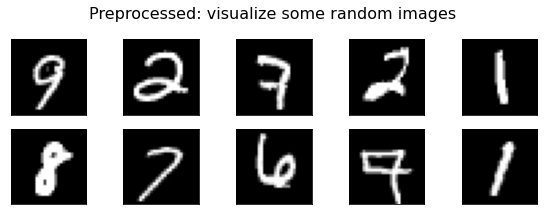

In [12]:
# visualize some random images using imshow() function
numImage = 10
fig = plt.figure(figsize=(8,3))
fig.suptitle('Preprocessed: visualize some random images', fontsize=16)
for i in range(numImage):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    img = train_X[np.random.randint(train_X.shape[0])]
    plt.imshow(img, cmap="gray")
plt.tight_layout()
plt.show()
fig.savefig("visualize-10-random-preprocessed", facecolor='white', edgecolor='none') # save fig

## c. Implementation

In [8]:
# define a CNN model
# reference: homework prompt
def create_cnn():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax')) 
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# print model.layers in the interactive shell 
# see that the model is generated as we defined
model = create_cnn()
model.layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

/Users/ryleeli/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## d. Training and Evaluating CNN

In [10]:
# call the fit method with a validation split of 0.1
model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
# call the evaluate method on the test data-set
score = model.evaluate(test_X, test_Y, verbose=0)

Epoch 1/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1777 - accuracy: 0.9449 - val_loss: 0.0703 - val_accuracy: 0.9802
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.0537 - val_accuracy: 0.9855
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0474 - val_accuracy: 0.9872
Epoch 4/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0518 - val_accuracy: 0.9852
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0519 - val_accuracy: 0.9862
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0472 - val_accuracy: 0.9882
Epoch 7/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.0608 - val_ac

In [11]:
# report the accuracy on test data 
print('Test cross-entropy loss: %0.5f' % score[0])
print('Test accuracy: %0.5f' % score[1]) 

Test cross-entropy loss: 0.04300
Test accuracy: 0.98740


## e. Experimentation
### i. Run the above training for 50 epochs. Using pyplot, graph the validation and training accuracy after every 10 epochs.

In [12]:
# ran model
epoch_history = model.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)
# print validation and training accuracy over epochs
print(epoch_history.history['accuracy']) 
print(epoch_history.history['val_accuracy'])

Epoch 1/50
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0526 - val_accuracy: 0.9897
Epoch 2/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0565 - val_accuracy: 0.9888
Epoch 3/50
1688/1688 [==============================] - 12s 7ms/step - loss: 8.1793e-04 - accuracy: 1.0000 - val_loss: 0.0550 - val_accuracy: 0.9898
Epoch 4/50
1688/1688 [==============================] - 11s 6ms/step - loss: 6.8777e-04 - accuracy: 0.9999 - val_loss: 0.0559 - val_accuracy: 0.9895
Epoch 5/50
1688/1688 [==============================] - 11s 6ms/step - loss: 5.2181e-04 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 0.9898
Epoch 6/50
1688/1688 [==============================] - 11s 7ms/step - loss: 4.2669e-04 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9897
Epoch 7/50
1688/1688 [==============================] - 11s 6ms/step - loss: 3.9224e-04 - accuracy: 1.0000 - val_l

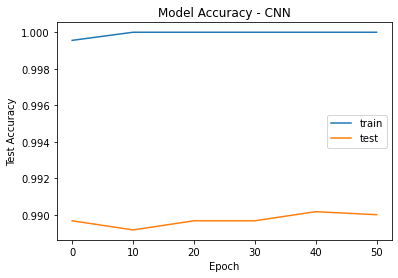

In [16]:
# store the output of the fit method while training your network
# Using pyplot, graph the validation and training accuracy after every 10 epochs
plt.plot(range(0,51,10), epoch_history.history['accuracy'][::10]+[epoch_history.history['accuracy'][-1]])
plt.plot(range(0,51,10), epoch_history.history['val_accuracy'][::10]+[epoch_history.history['val_accuracy'][-1]])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy - CNN')
plt.legend(['train', 'test'], loc='best')
plt.savefig("Model Accuracy - CNN", facecolor='white', edgecolor='none') # save fig

### ii. To avoid over-fitting in neural networks, we can ‘drop out’ a certain fraction of units randomly during the training phase. You can add the following layer (before the dense layer with 100 neurons) to your model defined in the function create_cnn.

In [14]:
# create the model
def create_cnn_dropped(): 
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Drop out a certain fraction of units randomly during the training phase
    model.add(Dropout(0.5)) # added
    # Dense layer of 100 neurons
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax')) 
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# run the model
model_dropped = create_cnn_dropped()
epoch_history_dropped = model_dropped.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)
# print validation and training accuracy over epochs
print(epoch_history_dropped.history['accuracy']) 
print(epoch_history_dropped.history['val_accuracy'])

Epoch 1/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2202 - accuracy: 0.9308 - val_loss: 0.0645 - val_accuracy: 0.9825
Epoch 2/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0902 - accuracy: 0.9724 - val_loss: 0.0571 - val_accuracy: 0.9838
Epoch 3/50
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0671 - accuracy: 0.9791 - val_loss: 0.0472 - val_accuracy: 0.9873
Epoch 4/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.0454 - val_accuracy: 0.9875
Epoch 5/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0436 - accuracy: 0.9856 - val_loss: 0.0424 - val_accuracy: 0.9880
Epoch 6/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0384 - accuracy: 0.9874 - val_loss: 0.0411 - val_accuracy: 0.9898
Epoch 7/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0319 - accuracy: 0.9893 - val_loss: 0.0414 - val_ac

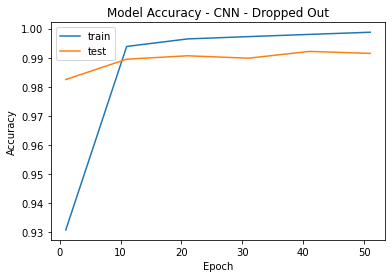

In [32]:
plt.plot(range(0,51,10), epoch_history_dropped.history['accuracy'][::10]+[epoch_history_dropped.history['accuracy'][-1]])
plt.plot(range(0,51,10), epoch_history_dropped.history['val_accuracy'][::10]+[epoch_history_dropped.history['val_accuracy'][-1]])
plt.title('Model Accuracy - CNN - Dropped Out')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='best')
plt.savefig("Model Accuracy - CNN - Dropped Out", facecolor='white', edgecolor='none') # save fig

### iii. Add another convolution layer and maxpooling layer to the create_cnn function defined above (immediately following the existing maxpooling layer). For the additional convolution layer, use 64 output filters. Train this for 10 epochs and report the test accuracy

In [20]:
# create model
def create_cnn_add_layer(): 
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Convolution layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(13, 13, 32)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax')) 
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
# run model 
model_add_layer = create_cnn_add_layer()
model_add_layer.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score_add_layer = model_add_layer.evaluate(test_X, test_Y, verbose=0)
print('Test cross-entropy loss: %0.5f' % score_add_layer[0])
print('Test accuracy: %0.5f' % score_add_layer[1])

Epoch 1/10
1688/1688 [==============================] - 23s 13ms/step - loss: 0.1963 - accuracy: 0.9371 - val_loss: 0.0463 - val_accuracy: 0.9863
Epoch 2/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0807 - accuracy: 0.9749 - val_loss: 0.0374 - val_accuracy: 0.9902
Epoch 3/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0625 - accuracy: 0.9801 - val_loss: 0.0375 - val_accuracy: 0.9888
Epoch 4/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.0355 - val_accuracy: 0.9905
Epoch 5/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.0321 - val_accuracy: 0.9895
Epoch 6/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0398 - accuracy: 0.9868 - val_loss: 0.0272 - val_accuracy: 0.9920
Epoch 7/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.0302 -

In [30]:
# inspect layers
model_add_layer.layers
model_add_layer.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

### iv. We used a learning rate of 0.01 in the given create_cnn function. Using learning rates of 0.001 and 0.1 respectively, train the model and report accuracy on test data-set. To be sure, we are working with 2 convolution layers and training for 10 epochs while doing this experiment

In [5]:
# create model 
def create_cnn_vary_rate(lr=0.01): 
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Convolution layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(13, 13, 32)))
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # initialize optimizer
    opt = SGD(lr=lr , momentum=0.9)
    # compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics =['accuracy'])
    return model

In [25]:
# learning rate = 0.001
model_cnn_vary_rate_1 = create_cnn_vary_rate(lr=0.001)
model_cnn_vary_rate_1.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score_cnn_vary_rate_1 = model_cnn_vary_rate_1.evaluate(test_X, test_Y, verbose=0)
print('Test cross-entropy loss: %0.5f' % score_cnn_vary_rate_1[0])
print('Test accuracy: %0.5f' % score_cnn_vary_rate_1[1])

Epoch 1/10
1688/1688 [==============================] - 25s 14ms/step - loss: 0.4250 - accuracy: 0.8652 - val_loss: 0.1009 - val_accuracy: 0.9742
Epoch 2/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1608 - accuracy: 0.9504 - val_loss: 0.0736 - val_accuracy: 0.9810
Epoch 3/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.1235 - accuracy: 0.9618 - val_loss: 0.0640 - val_accuracy: 0.9822
Epoch 4/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.1037 - accuracy: 0.9683 - val_loss: 0.0577 - val_accuracy: 0.9830
Epoch 5/10
1688/1688 [==============================] - 26s 15ms/step - loss: 0.0924 - accuracy: 0.9711 - val_loss: 0.0535 - val_accuracy: 0.9847
Epoch 6/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0835 - accuracy: 0.9744 - val_loss: 0.0462 - val_accuracy: 0.9867
Epoch 7/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0777 - accuracy: 0.9756 - val_loss: 0.0451 -

In [26]:
# learning rate = 0.1
model_cnn_vary_rate_2 = create_cnn_vary_rate(lr=0.1)
model_cnn_vary_rate_2.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score_cnn_vary_rate_2 = model_cnn_vary_rate_2.evaluate(test_X, test_Y, verbose=0)
print('Test cross-entropy loss: %0.5f' % score_cnn_vary_rate_2[0])
print('Test accuracy: %0.5f' % score_cnn_vary_rate_2[1])

Epoch 1/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.9928 - accuracy: 0.7178 - val_loss: 0.8907 - val_accuracy: 0.6885
Epoch 2/10
1688/1688 [==============================] - 27s 16ms/step - loss: 1.2484 - accuracy: 0.6214 - val_loss: 1.0980 - val_accuracy: 0.6158
Epoch 3/10
1688/1688 [==============================] - 25s 15ms/step - loss: 2.0908 - accuracy: 0.2276 - val_loss: 2.3197 - val_accuracy: 0.1113
Epoch 4/10
1688/1688 [==============================] - 24s 14ms/step - loss: 2.3081 - accuracy: 0.1061 - val_loss: 2.3123 - val_accuracy: 0.1050
Epoch 5/10
1688/1688 [==============================] - 24s 14ms/step - loss: 2.3079 - accuracy: 0.1066 - val_loss: 2.3106 - val_accuracy: 0.0960
Epoch 6/10
1688/1688 [==============================] - 24s 14ms/step - loss: 2.3085 - accuracy: 0.1036 - val_loss: 2.3079 - val_accuracy: 0.0952
Epoch 7/10
1688/1688 [==============================] - 24s 14ms/step - loss: 2.3078 - accuracy: 0.1041 - val_loss: 2.3092 -

# f. Analysis

In [16]:
# run the model - dropped out as of epochs = 10
model_dropped_10 = create_cnn_dropped()
model_dropped_10.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score_cnn_dropped_10 = model_dropped_10.evaluate(test_X, test_Y, verbose=0)
print('Test cross-entropy loss: %0.5f' % score_cnn_dropped_10[0])
print('Test accuracy: %0.5f' % score_cnn_dropped_10[1])

Epoch 1/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2208 - accuracy: 0.9312 - val_loss: 0.0818 - val_accuracy: 0.9793
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0897 - accuracy: 0.9729 - val_loss: 0.0658 - val_accuracy: 0.9813
Epoch 3/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0694 - accuracy: 0.9783 - val_loss: 0.0479 - val_accuracy: 0.9867
Epoch 4/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0552 - accuracy: 0.9825 - val_loss: 0.0451 - val_accuracy: 0.9878
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0465 - accuracy: 0.9852 - val_loss: 0.0476 - val_accuracy: 0.9880
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.0424 - val_accuracy: 0.9888
Epoch 7/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0346 - accuracy: 0.9885 - val_loss: 0.0439 - val_ac

In [13]:
# learning rate = 0.01 as of epoch 10
model_cnn_vary_rate_3 = create_cnn_vary_rate(lr=0.01)
model_cnn_vary_rate_3.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score_cnn_vary_rate_3 = model_cnn_vary_rate_3.evaluate(test_X, test_Y, verbose=0)
print('Test cross-entropy loss: %0.5f' % score_cnn_vary_rate_3[0])
print('Test accuracy: %0.5f' % score_cnn_vary_rate_3[1])

Epoch 1/10
1688/1688 [==============================] - 23s 13ms/step - loss: 0.2002 - accuracy: 0.9377 - val_loss: 0.0550 - val_accuracy: 0.9842
Epoch 2/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0815 - accuracy: 0.9740 - val_loss: 0.0440 - val_accuracy: 0.9888
Epoch 3/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0620 - accuracy: 0.9807 - val_loss: 0.0357 - val_accuracy: 0.9905
Epoch 4/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.0361 - val_accuracy: 0.9903
Epoch 5/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.0429 - accuracy: 0.9861 - val_loss: 0.0311 - val_accuracy: 0.9918
Epoch 6/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0379 - accuracy: 0.9874 - val_loss: 0.0331 - val_accuracy: 0.9907
Epoch 7/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0361 - accuracy: 0.9882 - val_loss: 0.0278 -